In [1]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

# Lagrangian for the system

## $\mathcal{L}=T-V$

## $\frac{d\mathcal{L}}{d\theta}-\frac{d}{dt}(\frac{d\mathcal{L}}{d\dot{\theta}})$

In [2]:
t, m1,l1,m2,l2,g=smp.symbols("t, m_1 l_1 m_2 l_2 g")
theta1,theta2=smp.symbols(r" \theta_1 \theta_2",cls=smp.Function)
theta1=theta1(t)
theta2=theta2(t)
d_theta1=smp.diff(theta1,t)
d_theta2=smp.diff(theta2,t)
dd_theta1=smp.diff(d_theta1,t)
dd_theta2=smp.diff(d_theta2,t)

In [3]:
x1=l1*smp.sin(theta1)
y1=-l1*smp.cos(theta1)
x2=l1*smp.sin(theta1)+l2*smp.sin(theta2)
y2=-l1*smp.cos(theta1)-l2*smp.cos(theta2)

In [4]:
y2

-l_1*cos(\theta_1(t)) - l_2*cos(\theta_2(t))

In [5]:
T_1=smp.Rational(1,2)*m1*(smp.diff(x1,t)**2+smp.diff(y1,t)**2)
V_1=m1*g*y1
T_2=m2*smp.Rational(1,2)*(smp.diff(x2,t)**2+smp.diff(y2,t)**2)
V_2=m2*g*y2

In [6]:
L=T_1+T_2-V_1-V_2

In [7]:
LE1= smp.diff(L,theta1)-smp.diff(smp.diff(L,d_theta1),t)
LE2= smp.diff(L,theta2)-smp.diff(smp.diff(L,d_theta2),t)

In [8]:
solutions=smp.solve([LE1,LE2],(dd_theta1,dd_theta2),rational=False,simplify=False)

In [9]:
domega1_dt_f=smp.lambdify([t,g,m1,l1,m2,l2,theta1,theta2,d_theta1,d_theta2],solutions[dd_theta1])
domega2_dt_f=smp.lambdify([t,g,m1,l1,m2,l2,theta1,theta2,d_theta1,d_theta2],solutions[dd_theta2])
dtheta1_dt_f=smp.lambdify(d_theta1,d_theta1)
dtheta2_dt_f=smp.lambdify(d_theta2,d_theta2)

In [19]:
def dSdt(S,t,g,m1,l1,m2,l2):
    return(dtheta1_dt_f(S[2]),dtheta2_dt_f(S[3]),domega1_dt_f(t,g,m1,l1,m2,l2,S[0],S[1],S[2],S[3]),domega2_dt_f(t,g,m1,l1,m2,l2,S[0],S[1],S[2],S[3]))

In [20]:
from scipy.integrate import odeint

In [39]:
t=np.linspace(1,100,10000)
g=9.8
l1=1
l2=2
m1=1
m2=2
sols=odeint(dSdt,y0=[np.pi/4,np.pi/2,0,0],t=t,args=(g,m1,l1,m2,l2))

In [40]:
ans=sols.T

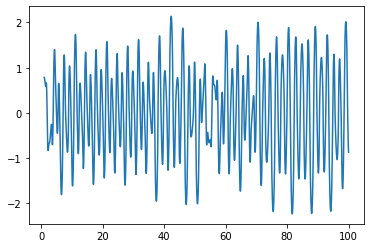

In [41]:
plt.plot(t,ans[0])
plt.show()

In [42]:
def get_cart(theta1,theta2):
    return(l1*np.sin(theta1),-l1*np.cos(theta1),l1*np.sin(theta1)+l2*np.sin(theta2),-l1*np.cos(theta1)-l2*np.cos(theta2))

In [43]:
cart=get_cart(ans[0],ans[1])

In [45]:
np.savetxt('data.csv',cart,delimiter=',')